<img src="http://certificate.tpq.io/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# EPAT Session 1

**Executive Program in Algorithmic Trading**

**_Vectorized Backtesting_**

Prof. Dr. Yves J. Hilpisch | The Python Quants GmbH | http://tpq.io

<a href="https://home.tpq.io/certificates/pyalgo" target="_blank"><img src="https://hilpisch.com/pyalgo_cover_color.png" width="300px" align="left" border="1px"></a>

## Basic Imports

In [1]:
import cufflinks
import numpy as np
import pandas as pd
from pylab import plt
plt.style.use('seaborn')
pd.set_option('mode.chained_assignment', None)
cufflinks.set_config_file(offline=True)

In [2]:
import cufflinks

## Reading Financial Data

In [3]:
url = 'http://hilpisch.com/pyalgo_eikon_eod_data.csv'

In [4]:
raw = pd.read_csv(url, index_col=0, parse_dates=True).dropna()

In [5]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2010-01-04 to 2019-12-31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2516 non-null   float64
 1   MSFT.O  2516 non-null   float64
 2   INTC.O  2516 non-null   float64
 3   AMZN.O  2516 non-null   float64
 4   GS.N    2516 non-null   float64
 5   SPY     2516 non-null   float64
 6   .SPX    2516 non-null   float64
 7   .VIX    2516 non-null   float64
 8   EUR=    2516 non-null   float64
 9   XAU=    2516 non-null   float64
 10  GDX     2516 non-null   float64
 11  GLD     2516 non-null   float64
dtypes: float64(12)
memory usage: 255.5 KB


In [6]:
raw.head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82
2010-01-08,30.282827,30.660,20.83,133.52,174.31,114.57,1144.98,18.13,1.4412,1136.10,49.84,111.37


In [7]:
raw.tail()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2019-12-24,284.27,157.38,59.41,1789.21,229.91,321.23,3223.38,12.67,1.1087,1498.8100,28.66,141.27
2019-12-26,289.91,158.67,59.82,1868.77,231.21,322.94,3239.91,12.65,1.1096,1511.2979,29.08,142.38
2019-12-27,289.80,158.96,60.08,1869.80,230.66,322.86,3240.02,13.43,1.1175,1510.4167,28.87,142.33
2019-12-30,291.52,157.59,59.62,1846.89,229.80,321.08,3221.29,14.82,1.1197,1515.1230,29.49,142.63
2019-12-31,293.65,157.70,59.85,1847.84,229.93,321.86,3230.78,13.78,1.1210,1517.0100,29.28,142.90


In [8]:
# symbol = 'AAPL.O'
symbol = 'EUR='

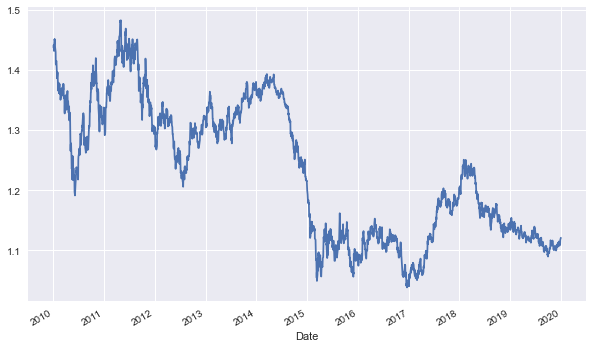

In [9]:
raw[symbol].plot(figsize=(10, 6));

## Efficient Markets

In [10]:
data = pd.DataFrame(raw[symbol])

In [11]:
lags = 5

In [12]:
cols = list()
for lag in range(1, lags + 1):
    col = f'lag_{lag}'
    data[col] = data[symbol].shift(lag)
    cols.append(col)

In [13]:
cols

['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5']

In [14]:
data.head(8)

,EUR=,lag_1,lag_2,lag_3,lag_4,lag_5
Date,,,,,,
2010-01-04,1.4411,NaN,NaN,NaN,NaN,NaN
2010-01-05,1.4368,1.4411,NaN,NaN,NaN,NaN
2010-01-06,1.4412,1.4368,1.4411,NaN,NaN,NaN
2010-01-07,1.4318,1.4412,1.4368,1.4411,NaN,NaN
2010-01-08,1.4412,1.4318,1.4412,1.4368,1.4411,NaN
2010-01-11,1.4513,1.4412,1.4318,1.4412,1.4368,1.4411
2010-01-12,1.4494,1.4513,1.4412,1.4318,1.4412,1.4368
2010-01-13,1.4510,1.4494,1.4513,1.4412,1.4318,1.4412


In [15]:
data.dropna(inplace=True)

In [16]:
reg = np.linalg.lstsq(data[cols], data[symbol], rcond=None)[0]
reg

array([ 0.98635864,  0.02292172, -0.04769849,  0.05037365, -0.01208135])

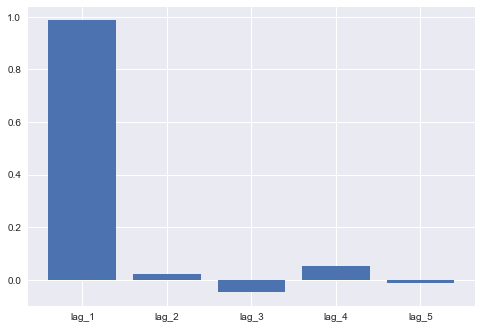

In [17]:
plt.bar(cols, reg);

In [18]:
data[cols].corr()  # high correlation is "violation" of major OLS regression assumption

,lag_1,lag_2,lag_3,lag_4,lag_5
lag_1,1.000000,0.998071,0.996202,0.994297,0.992543
lag_2,0.998071,1.000000,0.998072,0.996207,0.994302
lag_3,0.996202,0.998072,1.000000,0.998074,0.996212
lag_4,0.994297,0.996207,0.998074,1.000000,0.998076
lag_5,0.992543,0.994302,0.996212,0.998076,1.000000


## Simple Trading Strategy

In [19]:
data = pd.DataFrame(raw[symbol])

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2010-01-04 to 2019-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   EUR=    2516 non-null   float64
dtypes: float64(1)
memory usage: 39.3 KB


In [21]:
data['SMA1'] = data[symbol].rolling(42).mean()

In [22]:
data['SMA2'] = data[symbol].rolling(252).mean()

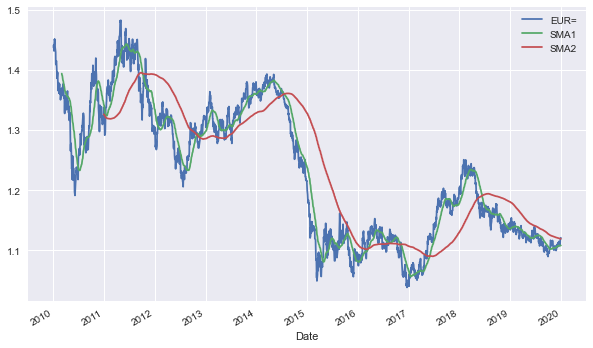

In [23]:
data.plot(figsize=(10, 6));

In [24]:
data.dropna(inplace=True)

In [25]:
data['position'] = np.where(data['SMA1'] > data['SMA2'], 'long', 'short')

In [26]:
data['position'] = np.where(data['SMA1'] > data['SMA2'], 1, -1)

In [27]:
data.head()

,EUR=,SMA1,SMA2,position
Date,,,,
2010-12-31,1.3377,1.342579,1.326218,1
2011-01-03,1.3351,1.340945,1.325798,1
2011-01-04,1.3301,1.338940,1.325374,1
2011-01-05,1.3151,1.336448,1.324874,1
2011-01-06,1.3001,1.333995,1.324351,1


In [28]:
data['position'].value_counts()

-1    1216
 1    1049
Name: position, dtype: int64

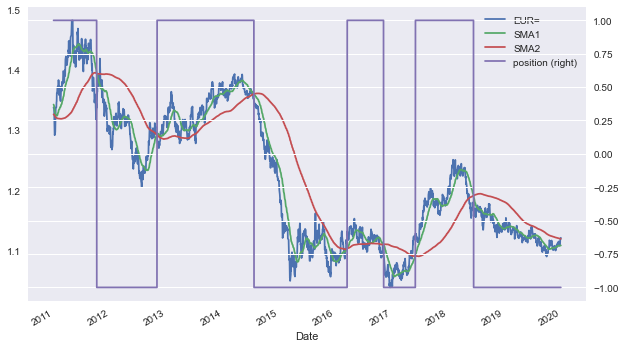

In [29]:
data.plot(figsize=(10, 6), secondary_y='position');

## Vectorized Backtesting

In [30]:
data['returns'] = np.log(data[symbol] / data[symbol].shift(1))

In [31]:
data['strategy'] = data['position'].shift(1) * data['returns']

In [32]:
data.head()

,EUR=,SMA1,SMA2,position,returns,strategy
Date,,,,,,
2010-12-31,1.3377,1.342579,1.326218,1,NaN,NaN
2011-01-03,1.3351,1.340945,1.325798,1,-0.001946,-0.001946
2011-01-04,1.3301,1.338940,1.325374,1,-0.003752,-0.003752
2011-01-05,1.3151,1.336448,1.324874,1,-0.011341,-0.011341
2011-01-06,1.3001,1.333995,1.324351,1,-0.011472,-0.011472


In [33]:
data.tail()

,EUR=,SMA1,SMA2,position,returns,strategy
Date,,,,,,
2019-12-24,1.1087,1.107698,1.119630,-1,0.000090,-0.000090
2019-12-26,1.1096,1.107740,1.119529,-1,0.000811,-0.000811
2019-12-27,1.1175,1.107924,1.119428,-1,0.007094,-0.007094
2019-12-30,1.1197,1.108131,1.119333,-1,0.001967,-0.001967
2019-12-31,1.1210,1.108279,1.119231,-1,0.001160,-0.001160


In [34]:
data[['returns', 'strategy']].sum()  # sum of log returns (in "log space")

returns    -0.176731
strategy    0.253121
dtype: float64

In [35]:
data[['returns', 'strategy']].sum().apply(np.exp)  # gross performance

returns     0.838006
strategy    1.288039
dtype: float64

In [36]:
data[['returns', 'strategy']].sum().apply(np.exp) - 1  # net performance

returns    -0.161994
strategy    0.288039
dtype: float64

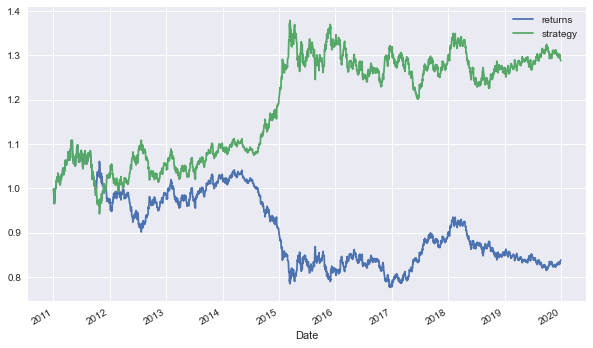

In [37]:
data[['returns', 'strategy']].cumsum().apply(np.exp).plot(figsize=(10, 6));

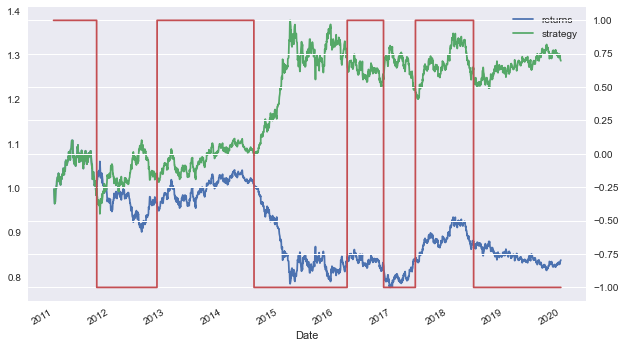

In [38]:
ax = data[['returns', 'strategy']].cumsum().apply(np.exp).plot(figsize=(10, 6))
data['position'].plot(ax=ax, secondary_y='position');

## Optimizing the Parameters (OOP Way)

### `FinancialData` Class

In [39]:
class FinancialData:
    url = 'http://hilpisch.com/pyalgo_eikon_eod_data.csv'
    def __init__(self, symbol):
        self.symbol = symbol
        self.get_data()
        self.prepare_data()
    def get_data(self):
        self.raw = pd.read_csv(self.url, index_col=0, parse_dates=True).dropna()
    def prepare_data(self):
        self.data = pd.DataFrame(self.raw[self.symbol])
        self.data['returns']  = np.log(self.data / self.data.shift(1))
    def plot_data(self, cols=None):
        if cols is None:
            cols = [self.symbol]
        self.data[cols].plot(figsize=(10, 6), title=self.symbol);

In [40]:
fd = FinancialData('EUR=')

In [41]:
fd.url  # class attribute

'http://hilpisch.com/pyalgo_eikon_eod_data.csv'

In [42]:
fd.symbol  # instance attribute

'EUR='

In [43]:
fd.raw.head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82
2010-01-08,30.282827,30.660,20.83,133.52,174.31,114.57,1144.98,18.13,1.4412,1136.10,49.84,111.37


In [44]:
fd.data.head()

,EUR=,returns
Date,,
2010-01-04,1.4411,NaN
2010-01-05,1.4368,-0.002988
2010-01-06,1.4412,0.003058
2010-01-07,1.4318,-0.006544
2010-01-08,1.4412,0.006544


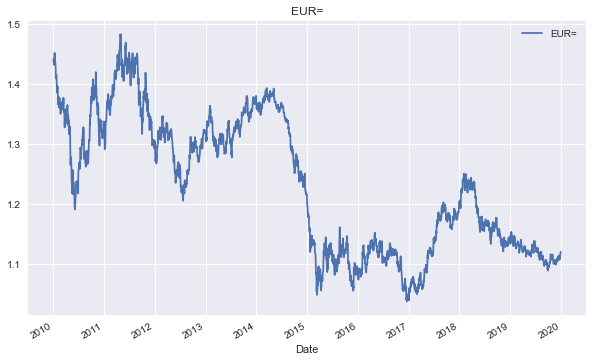

In [45]:
fd.plot_data()

In [46]:
fd = FinancialData('.VIX')

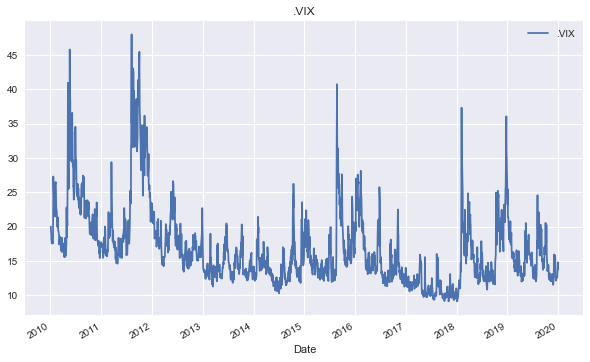

In [47]:
fd.plot_data()

### Vectorized Backtesting Class

In [48]:
class SMABacktester(FinancialData):
    def prepare_statistics(self, SMA1, SMA2):
        self.data['SMA1'] = self.data[self.symbol].rolling(SMA1).mean().shift(1)
        self.data['SMA2'] = self.data[self.symbol].rolling(SMA2).mean().shift(1)
    def backtest_strategy(self, SMA1, SMA2, cutoff=None):
        if cutoff is None:
            cutoff = SMA2
        self.prepare_statistics(SMA1, SMA2)
        self.data['position'] = np.where(self.data['SMA1'] > self.data['SMA2'], 1, -1)
        self.data['strategy'] = self.data['position'] * self.data['returns']
        perf = self.data[['returns', 'strategy']].iloc[cutoff:].sum().apply(np.exp)
        return perf
    def optimize_parameters(self, sma1, sma2):  # "brute force" optimization
        self.results = pd.DataFrame()
        for SMA1, SMA2 in product(sma1, sma2):
            perf = self.backtest_strategy(SMA1, SMA2, cutoff=300)
            r = pd.DataFrame({'SMA1': SMA1, 'SMA2': SMA2,
                             'Bench': perf['returns'],
                             'Strat': perf['strategy']}, index=[0,])
            self.results = self.results.append(r, ignore_index=True)
        return self.results.sort_values('Strat', ascending=False).head()

In [49]:
sma = SMABacktester('EUR=')

In [50]:
# sma = SMABacktester('AAPL.O')

In [51]:
SMA1 = 42
SMA2 = 252

In [52]:
sma.prepare_statistics(SMA1, SMA2)

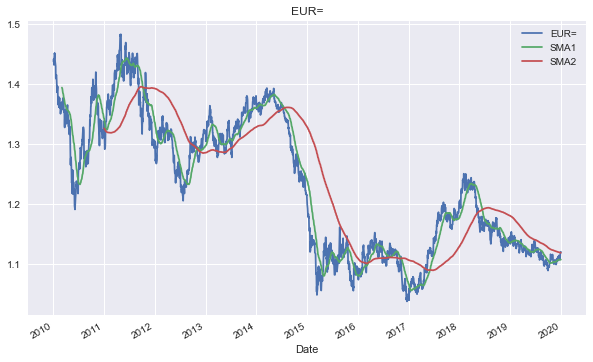

In [53]:
sma.plot_data([sma.symbol, 'SMA1', 'SMA2'])

In [54]:
sma.data.iloc[SMA2 - 2:].head()

,EUR=,returns,SMA1,SMA2
Date,,,,
2010-12-30,1.3281,0.004377,1.345383,NaN
2010-12-31,1.3377,0.007202,1.343798,NaN
2011-01-03,1.3351,-0.001946,1.342579,1.326218
2011-01-04,1.3301,-0.003752,1.340945,1.325798
2011-01-05,1.3151,-0.011341,1.338940,1.325374


In [55]:
sma.data.iloc[SMA2]

EUR=       1.335100
returns   -0.001946
SMA1       1.342579
SMA2       1.326218
Name: 2011-01-03 00:00:00, dtype: float64

In [56]:
sma.backtest_strategy(SMA1, SMA2)

returns     0.838006
strategy    1.288039
dtype: float64

### Optimization

In [57]:
from itertools import product

In [58]:
sma1 = [30, 42, 50]

In [59]:
sma2 = [200, 252, 300]

In [60]:
list(product(sma1, sma2))

[(30, 200),
 (30, 252),
 (30, 300),
 (42, 200),
 (42, 252),
 (42, 300),
 (50, 200),
 (50, 252),
 (50, 300)]

In [61]:
for SMA1, SMA2 in product(sma1, sma2):
    print(f'SMA1={SMA1} | SMA2={SMA2}')
    perf = sma.backtest_strategy(SMA1, SMA2, cutoff=300)
    print(f"Benchmark={perf['returns']:.3f}")
    print(f"Strategy ={perf['strategy']:.3f}" + '\n') 

SMA1=30 | SMA2=200
Benchmark=0.806
Strategy =1.236

SMA1=30 | SMA2=252
Benchmark=0.806
Strategy =1.251

SMA1=30 | SMA2=300
Benchmark=0.806
Strategy =1.182

SMA1=42 | SMA2=200
Benchmark=0.806
Strategy =1.099

SMA1=42 | SMA2=252
Benchmark=0.806
Strategy =1.239

SMA1=42 | SMA2=300
Benchmark=0.806
Strategy =1.299

SMA1=50 | SMA2=200
Benchmark=0.806
Strategy =1.024

SMA1=50 | SMA2=252
Benchmark=0.806
Strategy =1.375

SMA1=50 | SMA2=300
Benchmark=0.806
Strategy =1.309



In [62]:
results = pd.DataFrame()
for SMA1, SMA2 in product(sma1, sma2):
    perf = sma.backtest_strategy(SMA1, SMA2, cutoff=300)
    r = pd.DataFrame({'SMA1': SMA1, 'SMA2': SMA2,
                     'Bench': perf['returns'],
                     'Strat': perf['strategy']}, index=[0,])
    results = results.append(r, ignore_index=True)

In [63]:
results.sort_values('Strat', ascending=False)

,SMA1,SMA2,Bench,Strat
7,50,252,0.806069,1.375127
8,50,300,0.806069,1.309454
5,42,300,0.806069,1.298605
1,30,252,0.806069,1.251006
4,42,252,0.806069,1.238951
0,30,200,0.806069,1.236273
2,30,300,0.806069,1.182053
3,42,200,0.806069,1.099468
6,50,200,0.806069,1.024346


In [64]:
sma1 = range(30, 61, 5)
sma2 = range(150, 301, 25)

In [65]:
sma.optimize_parameters(sma1, sma2)

,SMA1,SMA2,Bench,Strat
32,50,250,0.806069,1.388250
28,50,150,0.806069,1.351676
27,45,300,0.806069,1.341468
0,30,150,0.806069,1.335596
19,40,275,0.806069,1.331264


In [66]:
sma.results.sort_values('Strat', ascending=False).head()

,SMA1,SMA2,Bench,Strat
32,50,250,0.806069,1.388250
28,50,150,0.806069,1.351676
27,45,300,0.806069,1.341468
0,30,150,0.806069,1.335596
19,40,275,0.806069,1.331264


In [67]:
sma.results.groupby('SMA1').mean()

,SMA2,Bench,Strat
SMA1,,,
30,225,0.806069,1.228568
35,225,0.806069,1.218251
40,225,0.806069,1.236716
45,225,0.806069,1.248350
50,225,0.806069,1.273136
55,225,0.806069,1.245244
60,225,0.806069,1.226332


<img src="http://certificate.tpq.io/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>